In [0]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [4]:
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


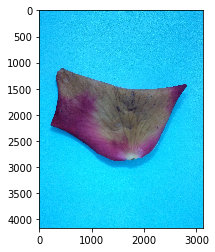

In [5]:
i=cv.imread("/content/gdrive/My Drive/Centro de biosistemas/Botrytis/Data-set/Toma 2/19.jpg")
i=cv.cvtColor(i, cv.COLOR_RGB2BGR)
plt.imshow(i)

In [0]:
i1=cv.cvtColor(i, cv.COLOR_RGB2YUV)
i1=i1[:,:,2]

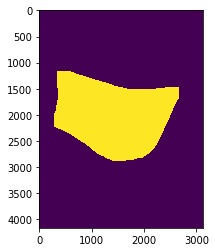

In [0]:
u,oi = cv.threshold(i1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
kernel = np.ones((5,5),np.uint8)
erosion = cv.dilate(oi,kernel,iterations = 1)
opening = cv.morphologyEx(erosion, cv.MORPH_OPEN, kernel,iterations =50)
msk=opening
msk=msk/255
plt.imshow(msk)


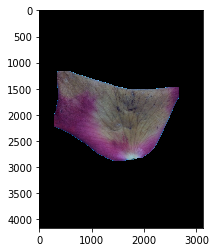

In [0]:

for z in range(3):
    i[:,:,z]=(i[:,:,z]*(msk))
plt.imshow(i)


In [0]:
i0=cv.cvtColor(i, cv.COLOR_RGB2LAB)
i0=i0[:,:,1]
i1=cv.cvtColor(i, cv.COLOR_RGB2YUV)
i1=i1[:,:,1]
i2=cv.cvtColor(i, cv.COLOR_RGB2YCrCb)
i2=i2[:,:,2]

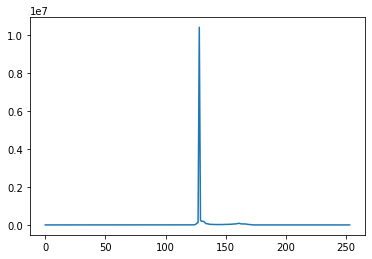

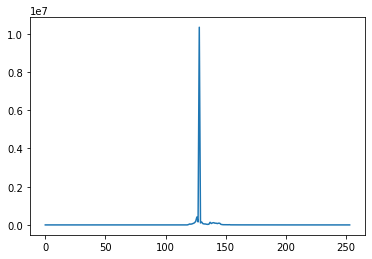

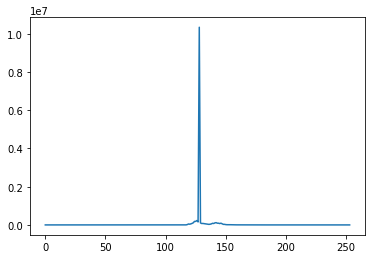

In [0]:
hi0=np.histogram(i0, bins=np.arange(255))[0]
plt.plot(hi0)
plt.show()
hi1=np.histogram(i1, bins=np.arange(255))[0]
plt.plot(hi1)
plt.show()
hi2=np.histogram(i2, bins=np.arange(255))[0]
plt.plot(hi2)
plt.show()

In [0]:

def severidad(i):  
  kernel = np.ones((5,5),np.uint8)
  sana=(i>140)
  fondo=(i<25)
  enfermo=1-(fondo+sana)
  total=enfermo+sana
  sumenfe=np.sum(enfermo)
  sumtot=np.sum(total)
  s=(sumenfe/sumtot)*100
  return s

In [0]:
def acop (im):

  cs=cv.cvtColor(im, cv.COLOR_RGB2YUV)
  cs=cs[:,:,2]

  u,oi = cv.threshold(cs,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
  kernel = np.ones((3,3),np.uint8)
  erosion = cv.dilate(oi,kernel,iterations = 5)
  opening = cv.morphologyEx(erosion, cv.MORPH_OPEN, kernel,iterations =100)
  ner = cv.dilate(opening,kernel,iterations = 2)
  msk=ner
  msk=msk/255

  for z in range(3):
    im[:,:,z]=(im[:,:,z]*(msk))

  i0=cv.cvtColor(im, cv.COLOR_RGB2LAB)
  i0=i0[:,:,1]
  i1=cv.cvtColor(im, cv.COLOR_RGB2YUV)
  i1=i1[:,:,1]
  i2=cv.cvtColor(im, cv.COLOR_RGB2YCrCb)
  i2=i2[:,:,2]

  chl=[i0,i1,i2,im]
  return chl

In [0]:
pr=[]
pred=[]
for x in range (1,21):
  st="/content/gdrive/My Drive/Centro de biosistemas/Botrytis/Data-set/Toma 2/"+str(x)+".jpg"
  sst="/content/gdrive/My Drive/Centro de biosistemas/Botrytis/Resultados/Segmentacion/"+str(x)+".jpg"
  gst="/content/gdrive/My Drive/Centro de biosistemas/Botrytis/Ground-Truth/Toma 2/"+str(x)+".jpg"

  gt=cv.imread(gst, cv.IMREAD_GRAYSCALE)
  sev=severidad(gt)
  pred=pred+[sev]

  i=cv.imread(st)
  i=cv.cvtColor(i, cv.COLOR_RGB2BGR)
  aim=acop(i)
  nim=cv.cvtColor(aim[3], cv.COLOR_BGR2RGB)
  cv.imwrite (sst, nim)

  hi0=np.histogram(aim[0], bins=np.arange(257))[0]
  hi1=np.histogram(aim[1], bins=np.arange(257))[0]
  hi2=np.histogram(aim[2], bins=np.arange(257))[0]
  
  hi=np.concatenate((hi0, hi1, hi2), axis=0)

  pr=pr+[hi]
  


In [0]:
i=cv.imread("/content/gdrive/My Drive/Centro de biosistemas/Botrytis/Ground-Truth/Toma 2/2.jpg", cv.IMREAD_GRAYSCALE)
sev=severidad(i)
print(sev)

0.54290276647588


In [0]:
pr=np.array(pr)
pred=np.array(pred)
matri=[]
for x in range (0,np.shape(pr)[1]):
  predictor=pr[:,x]
  pc=np.corrcoef(pred, predictor)[0,1]
  pc=np.abs(pc)
  #print(pc)
  if pc!='nan' and pc>0.5:
    matri=matri+[predictor]
print(matri)



[array([  26,    0,    0,    0,    0,  338, 2322, 2648,  233,    0,    0,
         83,  258, 1350,  567,   21, 3829,  177, 1486, 2669]), array([  93,    1,    0,    0,    0,  895, 2834, 3130,  536,    0,    0,
        290,  454, 2086,  989,   83, 4069,  447, 2072, 3306]), array([ 325,   11,    2,    0,    0, 1347, 2603, 2810,  970,    0,    2,
        679,  844, 2667, 1259,  455, 3775, 1018, 1970, 4553]), array([ 917,   66,    0,    0,    1, 2276, 2160, 2353, 1657,    3,    5,
       1037, 1327, 2572, 1533,  915, 3206, 1965, 1793, 4931]), array([1671,  238,    0,    0,    0, 2790, 1518, 1780, 2417,    4,   51,
       1402, 1915, 2414, 1821, 1299, 3037, 2457, 1499, 4557]), array([ 2760,  2062,  1353,  1815,  2637,  1006,  2901,  8465,  4254,
        4247,  1770,  1758,  2944, 12562,  3040,  3523,  3632,  5098,
        3012,  6085]), array([ 2038,  2586,  1233,  1419,  2981,   848,  3332,  8833,  4647,
        4863,  2431,  4959,  4217, 12477,  4032,  4380,  4326,  6250,
        2994,  9

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [0]:
from sklearn.decomposition import PCA
matri=np.array(matri)
matri=matri.T
maxes=np.amax(matri,axis=0)
matri=matri/maxes
pca = PCA(n_components=10)
plc = pca.fit_transform(matri)
print(plc)

[[ 2.03648841e+00  3.65413578e-01 -8.65772478e-01 -2.76420273e-01
   1.63111392e+00  4.60816150e-01 -2.79191830e-02 -4.87471152e-01
  -1.35273424e-01  1.19361967e-02]
 [ 2.48819897e+00  8.93885119e-02 -3.97119370e-01 -1.22637610e-01
   1.31789727e+00  1.12582785e-01 -3.24216634e-01 -3.13158518e-01
  -2.96501102e-01 -1.78609545e-01]
 [ 2.13203151e+00 -1.87236899e+00 -9.50558318e-01  7.12154712e-01
  -1.31773624e+00  1.07159953e-01 -3.33170702e-01 -8.21681382e-01
  -1.26661254e-02 -4.05920982e-01]
 [ 2.96624215e+00 -2.10924969e-01 -1.12786708e-02 -4.35098350e-01
  -2.65343540e-01 -1.30771241e-01 -2.72728582e-01  8.20208423e-01
   7.47670688e-01 -3.04088721e-01]
 [ 2.92715245e+00  5.66200801e-01  1.21732834e+00 -1.24472689e+00
  -3.95871304e-01  2.95171638e-02  3.69562020e-02  6.75249047e-01
  -9.77949094e-02 -1.15856956e-01]
 [ 2.30259975e+00  6.22515255e-01  1.20229494e+00 -9.91572543e-01
  -1.01462674e+00  9.74886755e-02  3.61164263e-01 -6.31486312e-01
  -5.06954263e-01  4.24574983e-01

In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(pr, pred.T)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
z_pred = regr.predict(pr)
print(z_pred)
print(pred)
#Los coeficientes
#print('Coefficients: \n', regr.coef_)
#Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(pred.T, z_pred))
#Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(pred.T, z_pred))

[  0.60453678   0.54290277   0.54606716   0.59309432   0.32744331
   0.30217881  95.00445943  86.41787999  99.37401375  45.6705754
  27.01857378  89.22483733  40.38712164  99.54209165 100.
  90.4421868   85.45753833  76.90004923  97.54950009  98.74454559]
[  0.60453678   0.54290277   0.54606716   0.59309432   0.32744331
   0.30217881  95.00445943  86.41787999  99.37401375  45.6705754
  27.01857378  89.22483733  40.38712164  99.54209165 100.
  90.4421868   85.45753833  76.90004923  97.54950009  98.74454559]
Mean squared error: 0.00
Variance score: 1.00
